In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

def startGame(gridSize, nPlayers):
    S = np.zeros((gridSize, gridSize, 2), dtype=int)
    S[:,:,0] = np.random.randint(nPlayers, size=(gridSize, gridSize))     # territory ownership
    S[:,:,1] += np.random.randint(10, size=(gridSize, gridSize))#3                                                             # troops per territory
    return S

def visState(S, nPlayers, title=None, action=None):
    gridSize = np.shape(S)[0]

    alpha = 0.5
    cmap = {0:[0.1,0.1,1.0,alpha],1:[1.0,0.1,0.1,alpha],2:[1.0,0.5,0.1,alpha]}
    labels = {0:'Player 0',1:'Player 1',2:'Player 2'}
    arrayShow = np.array([[cmap[i] for i in j] for j in S[:,:,0]])    
    ## create patches as legend
    patches =[mpatches.Patch(color=cmap[i],label=labels[i]) for i in cmap]

    plt.imshow(arrayShow)
    plt.legend(handles=patches, loc=4, borderaxespad=0.)

    for x in range(gridSize):
        for y in range(gridSize):
            plt.text(y,x,S[x,y,1])
    # plt.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
    if title is not None:
        plt.title(title)
    if action is not None:
        orig_x = action[0]
        orig_y = action[1]
        if action[2] == 'n':
            dy = 0.6
            dx = 0
            orig_y += 0.2
        if action[2] == 'e':
            dy = 0
            dx = 0.6
            orig_x += 0.2
        if action[2] == 's':
            dy = -0.6
            dx = 0
            orig_y -= 0.2
        if action[2] == 'w':
            dy = 0
            dx = -0.6
            orig_x -= 0.2
        plt.arrow(orig_x, orig_y, dx, dy, length_includes_head=True, width=0.05, color='black')

    # print(f'VIS S: owner \n {S[:,:,0]} \n troops \n {S[:,:,1]}')
    # print(f'S[0,0:4] {S[0,0,0]}, {S[0,1,0]}, {S[0,2,0]}, {S[0,3,0]}')
    plt.show()

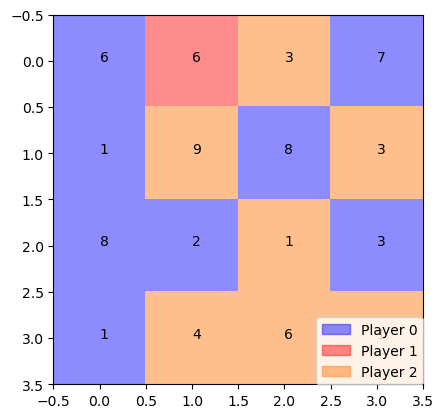

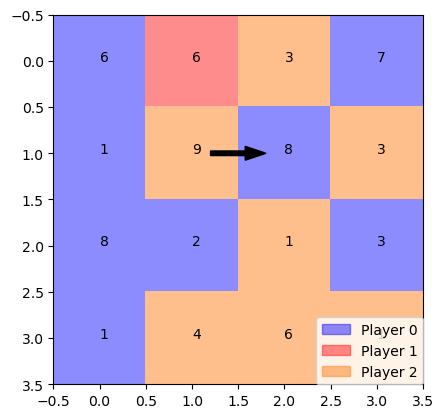

In [7]:
gridSize = 4
nPlayers = 3
S = startGame(gridSize, nPlayers)
visState(S, nPlayers)

a = (1,1,'e')
visState(S, nPlayers, action=a)

